In [ ]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

import skimage
from skimage import util
import skvideo.io

In [ ]:
INPUT="../data"

FileList=glob(os.path.join(INPUT,"*.avi"))

if len(FileList)>1:
    print("error: To many avi files")

    
## Find File Prefix
head, tail = os.path.split(FileList[0])
FilePrefix=tail.split(".avi")[0]
print(FileList[0])


In [ ]:
videodata = skvideo.io.vread(FileList[0],inputdict={"-r":"14"},outputdict={"-pix_fmt": "gray"})[:, :, :, 0]

## Open avi file and convert it to tiff
Further this tiff file used by ImageJ to substract background

In [4]:
## Read video file to numpy array
#output of skivide.io is a numpy array of following format
#(time_frame,height, width,colors)
#the colors chanell converted to the gray scale

video = skvideo.io.vread(FileList[0],inputdict={"-r":"14"},outputdict={"-pix_fmt": "gray"})[:, :, :, 0]
videometadata = skvideo.io.ffprobe(video)
frame_rate = videometadata['@avg_frame_rate']
r_frame_rate = videometadata['@r_frame_rate']
num_frames = np.int(videometadata['@nb_frames'])

# print videofile metadata  
#print(json.dumps(videometadata ["video"], indent=4))

T, M, N= videodata.shape
print("Number of frames: %d" % (T,))
print("Number of rows: %d" % (M,))
print("Number of cols: %d" % (N,))
#print("Color chanell: %d" % (C,))

print("Duration %s s" % videometadata['video']['@duration'])
print("Avaraged frame rate %s s = %d frame/s" % (frame_rate,int((frame_rate.split("/"))[0])/int((frame_rate.split("/"))[1])))
print("min frame rate %s = %d frames/s" % (r_frame_rate,int((r_frame_rate.split("/"))[0])/int((r_frame_rate.split("/"))[1])))


KeyError: '@avg_frame_rate'

In [5]:
video.shape

(127, 3264, 3372)

In [ ]:
skimage.io.imsave(os.path.join(head,FilePrefix)+"_original.tiff",videodata, plugin='tifffile')

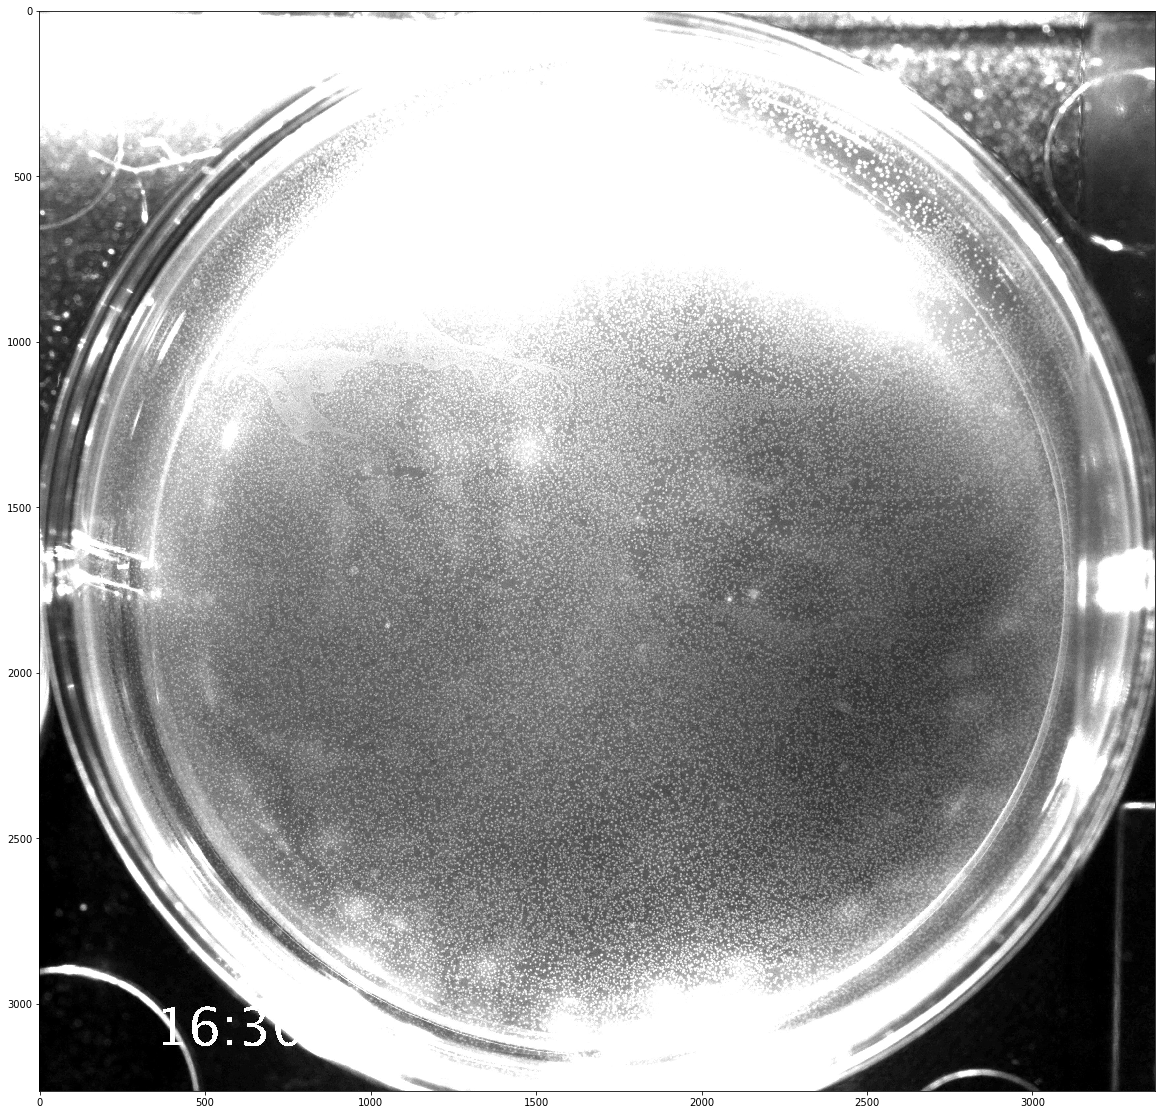

In [6]:
plt.figure(figsize=(20,20))
plt.imshow(videodata[100,:,:],cmap="gray")